In [ ]:
# Import the Libs

import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Section 1: Data Processing for Calculated Indexes

In [ ]:
# Importing data from the CSV file
indexes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Perks_dataset.csv')
indexes.head()

,user_id,hotel_hunter_index,average_bags_scaled,cancellation_rate_scaled,bargain_hunter_index,combined_booking_scaled,session_intencity_index
0,101961.0,NaN,0.080000,0.0,0.000058,1.0,0.0
1,106907.0,NaN,1.000000,0.5,NaN,1.0,0.0
2,181157.0,0.000495,0.200000,0.0,0.004943,1.0,0.0
3,190866.0,NaN,0.080000,0.0,NaN,1.0,0.0
4,204997.0,0.000898,0.066667,0.4,0.011774,0.8,0.0


In [ ]:
# Checking data formats
indexes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   5542 non-null   float64
 1   hotel_hunter_index        1646 non-null   float64
 2   average_bags_scaled       5178 non-null   float64
 3   cancellation_rate_scaled  5542 non-null   float64
 4   bargain_hunter_index      1718 non-null   float64
 5   combined_booking_scaled   5542 non-null   float64
 6   session_intencity_index   5998 non-null   float64
dtypes: float64(7)
memory usage: 328.1 KB


### **Customer Segmentation Strategy:**

1. I will start by ranking all customers for each perk based on their respective indexes in descending order.

2. After ranking, I will identify the minimum rank for each customer and label them according to the perk associated with that minimum rank.

3. I will develop a function to determine the rank based on the minimum rank identified.

4. If customers have multiple minimum ranks, I will assign them the label corresponding to the first minimum rank encountered.

5. Customers with no activity in bookings, resulting in all NaN values for indexes, will be classified as "Active Searchers."

6. Additionally, I will include customers whose minimum rank is "Session Activity" in this group, ensuring that I have customers with non-null indexes. This approach will help me gain insights into the preferences of this segment.

In [ ]:
# Ranking all indexes in descending order including NaNs

indexes['rank_hotel_hunter'] = indexes['hotel_hunter_index'].rank(na_option = 'keep', ascending=False)
indexes['rank_ave_bags'] = indexes['average_bags_scaled'].rank(na_option = 'keep', ascending=False)
indexes['rank_cancellation_rank'] = indexes['cancellation_rate_scaled'].rank(na_option = 'keep', ascending=False)
indexes['rank_bargain_hunter'] = indexes['bargain_hunter_index'].rank(na_option = 'keep', ascending=False)
indexes['rank_combined_booking'] = indexes['combined_booking_scaled'].rank(na_option = 'keep', ascending=False)
indexes['rank_session_activity'] = indexes['session_intencity_index'].rank(na_option = 'keep', ascending=False)
indexes.head(5)

,user_id,hotel_hunter_index,average_bags_scaled,cancellation_rate_scaled,bargain_hunter_index,combined_booking_scaled,session_intencity_index,rank_hotel_hunter,rank_ave_bags,rank_cancellation_rank,rank_bargain_hunter,rank_combined_booking,rank_session_activity
0,101961.0,NaN,0.080000,0.0,0.000058,1.0,0.0,NaN,3380.0,3069.0,1679.0,1233.0,3000.0
1,106907.0,NaN,1.000000,0.5,NaN,1.0,0.0,NaN,4.0,52.0,NaN,1233.0,3000.0
2,181157.0,0.000495,0.200000,0.0,0.004943,1.0,0.0,827.0,913.5,3069.0,467.0,1233.0,3000.0
3,190866.0,NaN,0.080000,0.0,NaN,1.0,0.0,NaN,3380.0,3069.0,NaN,1233.0,3000.0
4,204997.0,0.000898,0.066667,0.4,0.011774,0.8,0.0,619.0,3647.5,104.5,203.0,2675.5,3000.0


In [ ]:
# Finding the minimum rating for each user

indexes['min_c_h'] = indexes[['rank_hotel_hunter',
                              'rank_ave_bags',
                              'rank_cancellation_rank',
                              'rank_bargain_hunter',
                              'rank_combined_booking',
                              'rank_session_activity']].min(axis=1)
indexes.head()

,user_id,hotel_hunter_index,average_bags_scaled,cancellation_rate_scaled,bargain_hunter_index,combined_booking_scaled,session_intencity_index,rank_hotel_hunter,rank_ave_bags,rank_cancellation_rank,rank_bargain_hunter,rank_combined_booking,rank_session_activity,min_c_h
0,101961.0,NaN,0.080000,0.0,0.000058,1.0,0.0,NaN,3380.0,3069.0,1679.0,1233.0,3000.0,1233.0
1,106907.0,NaN,1.000000,0.5,NaN,1.0,0.0,NaN,4.0,52.0,NaN,1233.0,3000.0,4.0
2,181157.0,0.000495,0.200000,0.0,0.004943,1.0,0.0,827.0,913.5,3069.0,467.0,1233.0,3000.0,467.0
3,190866.0,NaN,0.080000,0.0,NaN,1.0,0.0,NaN,3380.0,3069.0,NaN,1233.0,3000.0,1233.0
4,204997.0,0.000898,0.066667,0.4,0.011774,0.8,0.0,619.0,3647.5,104.5,203.0,2675.5,3000.0,104.5


In [ ]:
# Creating a function to define the most attractive perk for each user:

def perk_define(row):
    if row['rank_hotel_hunter'] == row['min_c_h']:
        perk = 'Free Hotel Meal'
    elif row['rank_ave_bags'] == row['min_c_h']:
        perk = 'Free Checked Bag'
    elif row['rank_cancellation_rank'] == row['min_c_h']:
        perk = 'No Cancellation Fee'
    elif row['rank_bargain_hunter'] == row['min_c_h']:
        perk = 'Exclusive Discount'
    elif row['rank_combined_booking'] == row['min_c_h']:
        perk = 'Night Free Hotel with Flight'
    elif row['rank_session_activity'] == row['min_c_h']:
        perk = 'Active Searcher'
    else:
        'Not Defined'
    return perk



In [ ]:
# Applying the function to determine users' ranks:

indexes['most_attractive_perk'] = indexes.apply(perk_define, axis=1)
indexes.head()

,user_id,hotel_hunter_index,average_bags_scaled,cancellation_rate_scaled,bargain_hunter_index,combined_booking_scaled,session_intencity_index,rank_hotel_hunter,rank_ave_bags,rank_cancellation_rank,rank_bargain_hunter,rank_combined_booking,rank_session_activity,min_c_h,most_attractive_perk
0,101961.0,NaN,0.080000,0.0,0.000058,1.0,0.0,NaN,3380.0,3069.0,1679.0,1233.0,3000.0,1233.0,Night Free Hotel with Flight
1,106907.0,NaN,1.000000,0.5,NaN,1.0,0.0,NaN,4.0,52.0,NaN,1233.0,3000.0,4.0,Free Checked Bag
2,181157.0,0.000495,0.200000,0.0,0.004943,1.0,0.0,827.0,913.5,3069.0,467.0,1233.0,3000.0,467.0,Exclusive Discount
3,190866.0,NaN,0.080000,0.0,NaN,1.0,0.0,NaN,3380.0,3069.0,NaN,1233.0,3000.0,1233.0,Night Free Hotel with Flight
4,204997.0,0.000898,0.066667,0.4,0.011774,0.8,0.0,619.0,3647.5,104.5,203.0,2675.5,3000.0,104.5,No Cancellation Fee


In [ ]:
# Analyzing the number of users in each segment

indexes['most_attractive_perk'].value_counts()

most_attractive_perk
Free Checked Bag                1354
Free Hotel Meal                 1072
Night Free Hotel with Flight    1047
Active Searcher                 1034
Exclusive Discount              1000
No Cancellation Fee              491
Name: count, dtype: int64

In [ ]:
# Downloading the csv file for further analysis in Tableau

indexes.to_csv('Tableau_Dataset_Perks.csv')

# Section 2: Processing User Data

In [ ]:
# Importing the data from the CSV file

users_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/users_dataset.csv')
users_data.head()

,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,sign_up_date,num_sessions,...,destination_airport_lon,home_airport_lat,home_airport_lon,seats,rooms,departure_time,return_time,session_start,session_end,trip_id
0,94883,1972-03-16,F,True,False,usa,kansas city,MCI,2022-02-07,8,...,-79.370,39.297,-94.714,3.0,3.0,2023-04-16 10:00:00,2023-04-17 10:00:00,2023-05-28 17:28:00,2023-05-28 17:28:23,94883-bcc118ad37024c4ab14c62d46daf2ac0
1,153982,1978-08-15,F,False,True,canada,toronto,YKZ,2022-04-19,8,...,-73.779,43.862,-79.370,3.0,3.0,2023-07-31 11:00:00,2023-08-03 11:00:00,2023-07-20 20:37:00,2023-07-20 20:45:14,153982-f2187763b9a242f3b923b32ff0e3c7ab
2,167852,2006-02-16,F,False,False,usa,tampa,MCF,2022-05-03,8,...,NaN,27.849,-82.521,NaN,NaN,NaN,NaN,2023-04-25 17:14:00,2023-04-25 17:14:14,NaN
3,181157,1970-08-10,F,True,False,usa,houston,HOU,2022-05-15,8,...,-97.601,29.645,-95.279,6.0,6.0,2023-04-03 11:00:00,2023-04-07 11:00:00,2023-07-07 10:41:00,2023-07-07 10:42:16,181157-9d86219fb6574ef291b265f78e291c04
4,252835,1986-01-20,F,False,True,usa,chicago,ORD,2022-07-18,8,...,-73.779,41.979,-87.904,5.0,4.0,2023-07-19 10:00:00,2023-07-23 10:00:00,2023-07-10 06:24:00,2023-07-10 06:27:15,252835-db62add9d6364162adc85cc234a12552


In [ ]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  5998 non-null   int64  
 1   birthdate                5998 non-null   object 
 2   gender                   5998 non-null   object 
 3   married                  5998 non-null   bool   
 4   has_children             5998 non-null   bool   
 5   home_country             5998 non-null   object 
 6   home_city                5998 non-null   object 
 7   home_airport             5998 non-null   object 
 8   sign_up_date             5998 non-null   object 
 9   num_sessions             5998 non-null   int64  
 10  total_page_clicks        5998 non-null   int64  
 11  total_flight_discount    5998 non-null   int64  
 12  total_hotel_discount     5998 non-null   int64  
 13  total_flights_booked     5998 non-null   int64  
 14  total_hotels_booked     

I have identified a few issues in our dataset that require attention:

1. Convert 'Birthdate' to date format.
2. Calculate the age based on 'Birthdate'.
3. Check the 'Gender' column for the number of unique values and consider converting this data to boolean.

In [ ]:
# Converting birthdate to date format and calculating age

users_data['birthdate'] = pd.to_datetime(users_data['birthdate'], errors='coerce')

users_data['age'] = (pd.Timestamp.now() - users_data['birthdate'])//np.timedelta64(1,'Y')
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5998 entries, 0 to 5997
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  5998 non-null   int64         
 1   birthdate                5998 non-null   datetime64[ns]
 2   gender                   5998 non-null   object        
 3   married                  5998 non-null   bool          
 4   has_children             5998 non-null   bool          
 5   home_country             5998 non-null   object        
 6   home_city                5998 non-null   object        
 7   home_airport             5998 non-null   object        
 8   sign_up_date             5998 non-null   object        
 9   num_sessions             5998 non-null   int64         
 10  total_page_clicks        5998 non-null   int64         
 11  total_flight_discount    5998 non-null   int64         
 12  total_hotel_discount     5998 non-

In [ ]:
# Checking values in gender column

users_data['gender'].value_counts()

gender
F    5292
M     695
O      11
Name: count, dtype: int64

In [ ]:
# Replacing insignificant O-values in the gender column with the most frequent value ("F") and converting the column to boolean (O-values constitute only 0.18% of the total)

replace_values = {'F' : True, 'O' : True, 'M' : False }
users_data['gender'] = users_data['gender'].map(replace_values)

In [ ]:
# Dropping unnecessary columns from the 'users_data' DataFrame to retain only relevant information

users_data.drop(['birthdate','home_country',
                 'home_city', 'home_airport',
                 'home_airport_lat', 'home_airport_lon',
                 'sign_up_date'], axis='columns', inplace=True)

In [ ]:
users_data.head()

,user_id,gender,married,has_children,num_sessions,total_page_clicks,total_flight_discount,total_hotel_discount,total_flights_booked,total_hotels_booked,...,destination_airport_lat,destination_airport_lon,seats,rooms,departure_time,return_time,session_start,session_end,trip_id,age
0,94883,True,True,False,8,73,0,1,2,2,...,43.862,-79.370,3.0,3.0,2023-04-16 10:00:00,2023-04-17 10:00:00,2023-05-28 17:28:00,2023-05-28 17:28:23,94883-bcc118ad37024c4ab14c62d46daf2ac0,52
1,153982,True,False,True,8,150,0,1,3,3,...,51.114,-73.779,3.0,3.0,2023-07-31 11:00:00,2023-08-03 11:00:00,2023-07-20 20:37:00,2023-07-20 20:45:14,153982-f2187763b9a242f3b923b32ff0e3c7ab,45
2,167852,True,False,False,8,63,1,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-25 17:14:00,2023-04-25 17:14:14,NaN,18
3,181157,True,True,False,8,153,2,1,3,3,...,35.393,-97.601,6.0,6.0,2023-04-03 11:00:00,2023-04-07 11:00:00,2023-07-07 10:41:00,2023-07-07 10:42:16,181157-9d86219fb6574ef291b265f78e291c04,53
4,252835,True,False,True,8,117,1,1,5,4,...,53.667,-73.779,5.0,4.0,2023-07-19 10:00:00,2023-07-23 10:00:00,2023-07-10 06:24:00,2023-07-10 06:27:15,252835-db62add9d6364162adc85cc234a12552,38


In [ ]:
# Downloading the csv file for further analysis in Tableau

indexes.to_csv('Tableau_User_Dataset.csv')

# Section 3: Deep data analysis

In [ ]:
%matplotlib inline
import pandas as pd
from tabulate import tabulate
from IPython.display import HTML
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import radians, atan2, sqrt, sin, cos
from datetime import timedelta
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances


#Import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/users_dataset.csv')


# Create a formatted table
table_html = tabulate(df.head(), headers='keys', tablefmt='html')

# Display the table
HTML(table_html)







,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,sign_up_date,num_sessions,total_page_clicks,total_flight_discount,total_hotel_discount,total_flights_booked,total_hotels_booked,total_cancellations,total_checked_bags,destination_airport_lat,destination_airport_lon,home_airport_lat,home_airport_lon,seats,rooms,departure_time,return_time,session_start,session_end,trip_id
0,94883,1972-03-16,F,True,False,usa,kansas city,MCI,2022-02-07,8,73,0,1,2,2,0,1,43.862,-79.37,39.297,-94.714,3,3,2023-04-16 10:00:00,2023-04-17 10:00:00,2023-05-28 17:28:00,2023-05-28 17:28:23,94883-bcc118ad37024c4ab14c62d46daf2ac0
1,153982,1978-08-15,F,False,True,canada,toronto,YKZ,2022-04-19,8,150,0,1,3,3,0,1,51.114,-73.779,43.862,-79.37,3,3,2023-07-31 11:00:00,2023-08-03 11:00:00,2023-07-20 20:37:00,2023-07-20 20:45:14,153982-f2187763b9a242f3b923b32ff0e3c7ab
2,167852,2006-02-16,F,False,False,usa,tampa,MCF,2022-05-03,8,63,1,2,0,0,0,nan,nan,nan,27.849,-82.521,nan,nan,nan,nan,2023-04-25 17:14:00,2023-04-25 17:14:14,nan
3,181157,1970-08-10,F,True,False,usa,houston,HOU,2022-05-15,8,153,2,1,3,3,0,3,35.393,-97.601,29.645,-95.279,6,6,2023-04-03 11:00:00,2023-04-07 11:00:00,2023-07-07 10:41:00,2023-07-07 10:42:16,181157-9d86219fb6574ef291b265f78e291c04
4,252835,1986-01-20,F,False,True,usa,chicago,ORD,2022-07-18,8,117,1,1,5,4,0,3,53.667,-73.779,41.979,-87.904,5,4,2023-07-19 10:00:00,2023-07-23 10:00:00,2023-07-10 06:24:00,2023-07-10 06:27:15,252835-db62add9d6364162adc85cc234a12552


Looking at the table, I noticed some missing values. Additionally, some data is in boolean format, which I've decided to convert to integers for more flexibility in future use.

In [ ]:
# Convert boolean columns to numerical
df['married'] = df['married'].astype(int)
df['has_children'] = df['has_children'].astype(int)

Removing the 'trip_id' Column

I've noticed the 'trip_id' column in my dataset, which isn't needed for my analysis. So, I've decided to remove it before dealing with the missing values.

In [ ]:
# Drop the "trip_id" column
df = df.drop(columns=['trip_id'])

Identifying Missing Values

Since I know there are missing values in my dataset, I'm now focusing on pinpointing which columns have these gaps. I'll revisit this step later to maintain the accuracy of my analysis.

In [ ]:
#Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

user_id                      0
birthdate                    0
gender                       0
married                      0
has_children                 0
home_country                 0
home_city                    0
home_airport                 0
sign_up_date                 0
num_sessions                 0
total_page_clicks            0
total_flight_discount        0
total_hotel_discount         0
total_flights_booked         0
total_hotels_booked          0
total_cancellations          0
total_checked_bags         818
destination_airport_lat    818
destination_airport_lon    818
home_airport_lat             0
home_airport_lon             0
seats                      818
rooms                      596
departure_time             818
return_time                876
session_start                0
session_end                  0
dtype: int64


Addressing Missing and Infinite Values

The output shows columns with missing values, likely from customers who visited TravelTide but didn't book. I've decided to address these gaps to ready the data for analysis. I'll also check for any infinite values before moving forward.

In [ ]:
# List of columns to check
columns_to_check = ['num_sessions', 'total_page_clicks', 'total_flight_discount', 'total_hotel_discount',
                    'total_flights_booked', 'total_hotels_booked', 'total_cancellations', 'total_checked_bags',
                    'destination_airport_lat', 'destination_airport_lon', 'seats', 'rooms', 'departure_time',
                    'return_time', 'session_start', 'session_end']

# Filter columns to check only numeric columns
numeric_columns_to_check = [col for col in columns_to_check if df[col].dtype in (np.float64, np.int64)]

# Check for infinite values
infinite_value_counts = df[numeric_columns_to_check].apply(np.isinf).sum()

print("Infinite value counts:")
print(infinite_value_counts)

Infinite value counts:
num_sessions               0
total_page_clicks          0
total_flight_discount      0
total_hotel_discount       0
total_flights_booked       0
total_hotels_booked        0
total_cancellations        0
total_checked_bags         0
destination_airport_lat    0
destination_airport_lon    0
seats                      0
rooms                      0
dtype: int64


Handling Missing Values

To maintain data integrity, I'm removing rows with missing values in specific columns. These gaps relate to users who didn't make bookings. This step helps keep the data consistent and ensures our analysis accurately reflects customer behavior, especially those who didn't engage in trip-related activities.

In [ ]:
# List of columns with missing values
columns_to_check = ['departure_time', 'return_time', 'total_checked_bags', 'destination_airport_lat', 'destination_airport_lon', 'seats', 'rooms']

# Remove rows with missing values in the specified columns
df = df.dropna(subset=columns_to_check)

# Display the DataFrame after removing
df.head()


,user_id,birthdate,gender,married,has_children,home_country,home_city,home_airport,sign_up_date,num_sessions,...,destination_airport_lat,destination_airport_lon,home_airport_lat,home_airport_lon,seats,rooms,departure_time,return_time,session_start,session_end
0,94883,1972-03-16,F,1,0,usa,kansas city,MCI,2022-02-07,8,...,43.862,-79.370,39.297,-94.714,3.0,3.0,2023-04-16 10:00:00,2023-04-17 10:00:00,2023-05-28 17:28:00,2023-05-28 17:28:23
1,153982,1978-08-15,F,0,1,canada,toronto,YKZ,2022-04-19,8,...,51.114,-73.779,43.862,-79.370,3.0,3.0,2023-07-31 11:00:00,2023-08-03 11:00:00,2023-07-20 20:37:00,2023-07-20 20:45:14
3,181157,1970-08-10,F,1,0,usa,houston,HOU,2022-05-15,8,...,35.393,-97.601,29.645,-95.279,6.0,6.0,2023-04-03 11:00:00,2023-04-07 11:00:00,2023-07-07 10:41:00,2023-07-07 10:42:16
4,252835,1986-01-20,F,0,1,usa,chicago,ORD,2022-07-18,8,...,53.667,-73.779,41.979,-87.904,5.0,4.0,2023-07-19 10:00:00,2023-07-23 10:00:00,2023-07-10 06:24:00,2023-07-10 06:27:15
5,283325,1973-05-15,F,1,0,usa,dallas,DAL,2022-08-12,8,...,46.788,-71.398,32.847,-96.852,1.0,3.0,2023-03-05 14:00:00,2023-03-11 14:00:00,2023-06-22 21:04:00,2023-06-22 21:05:53


Overview of the Data

I'm now summarizing key numerical columns in the DataFrame, focusing on those relevant to user behavior and booking details. By using the describe() function, I'll get important statistical metrics, giving a quick and insightful overview of these columns. This helps streamline data exploration and understanding.

In [ ]:
# Define the numerical columns to include them
stats_columns = ['num_sessions', 'total_page_clicks', 'total_flight_discount', 'total_hotel_discount',
                 'total_flights_booked', 'total_hotels_booked', 'total_cancellations', 'total_checked_bags',
                 'seats', 'rooms']

# Generate the statistical summary
summary = df[stats_columns].describe().T

# Display the summary
display(summary)


,count,mean,std,min,25%,50%,75%,max
num_sessions,4986.0,8.207982,0.464016,8.0,8.0,8.0,8.0,11.0
total_page_clicks,4986.0,151.356799,72.661516,49.0,109.0,133.0,165.0,873.0
total_flight_discount,4986.0,1.499198,1.112751,0.0,1.0,1.0,2.0,6.0
total_hotel_discount,4986.0,1.141596,1.000906,0.0,0.0,1.0,2.0,6.0
total_flights_booked,4986.0,2.815082,1.334032,1.0,2.0,3.0,4.0,9.0
total_hotels_booked,4986.0,2.870437,1.310577,1.0,2.0,3.0,4.0,9.0
total_cancellations,4986.0,0.108905,0.320439,0.0,0.0,0.0,0.0,2.0
total_checked_bags,4986.0,1.655235,1.429896,0.0,1.0,1.0,2.0,17.0
seats,4986.0,3.398516,1.927011,1.0,2.0,3.0,4.0,17.0
rooms,4986.0,3.381869,1.790363,1.0,2.0,3.0,4.0,14.0


Summary of Key Insights

This summary highlights the central tendencies, spreads, and distributions of numerical features in the dataset. Notably, the columns `num_sessions` and `total_cancellations` show limited variability. While the low variability in `num_sessions` isn't a major concern for analyzing user engagement, `total_cancellations` is crucial for understanding the Free Cancellation perk. Successfully removing rows with missing data is evident as the dataset now has 4986 rows, down from the original 5998.

**num_sessions:**
- 4986 data points
- Average: ~8.20 sessions per user
- Low variability (Standard Deviation: ~0.46)
- Most users (25th to 75th percentile) have 8 sessions or fewer
- Median: 8 sessions
- Range: 8 to 11 sessions

**total_cancellations:**
- 4986 data points
- Average: ~0.11 cancellations per user
- Low variability (Standard Deviation: ~0.32)
- Majority of users report zero cancellations
- Median: 0 cancellations
- Range: 0 to 2 cancellations

Visualizing Outliers and Distribution

Next, I explore the data's statistical characteristics by visualizing potential outliers and assessing the overall distribution. This helps identify anomalies or patterns in the numerical features. The following code displays histograms and box plots for key numerical columns, providing a clear view of their distributions and highlighting any notable trends or outliers.

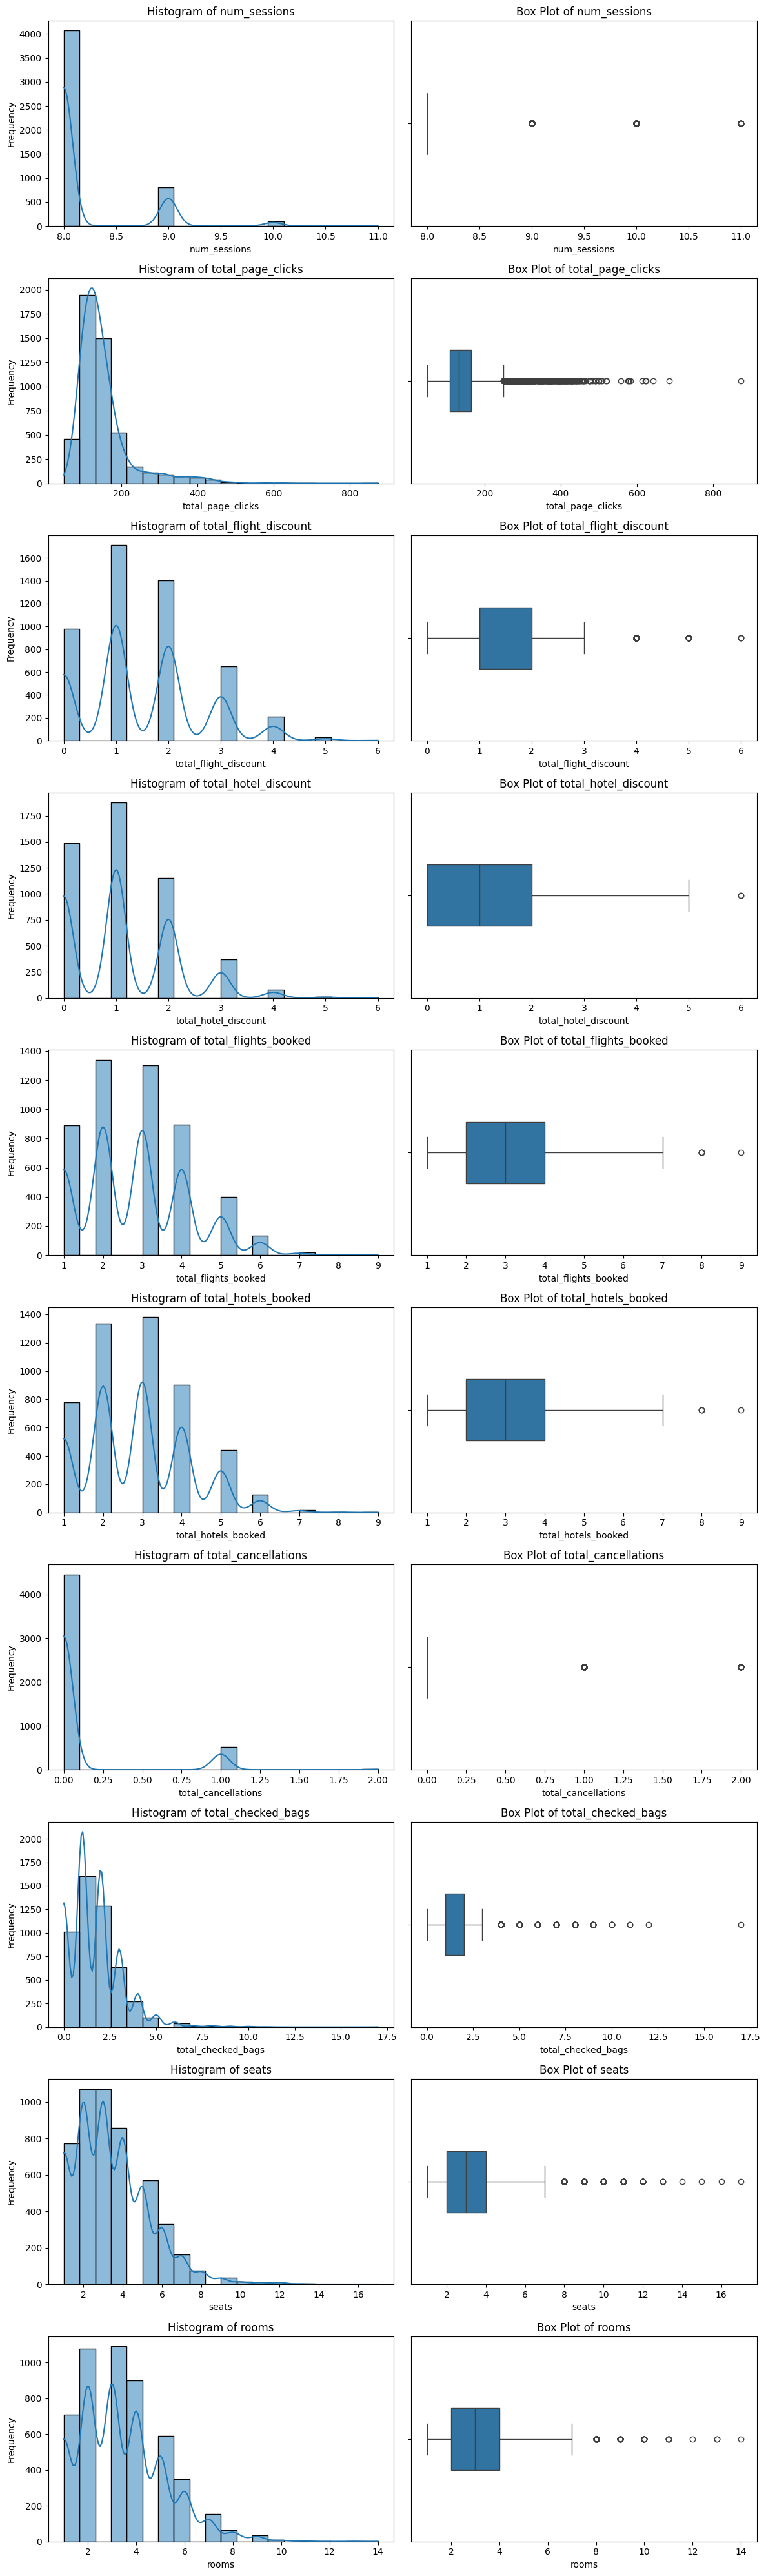

In [ ]:
# Select numerical columns for analysis
numerical_columns = ['num_sessions', 'total_page_clicks', 'total_flight_discount', 'total_hotel_discount',
                     'total_flights_booked', 'total_hotels_booked', 'total_cancellations', 'total_checked_bags',
                     'seats', 'rooms']

# Calculate the number of rows for the subplots
num_plots = len(numerical_columns)

# Create subplots with histograms and box plots
fig, axes = plt.subplots(num_plots, 2, figsize=(12, 4 * num_plots))

for i, column in enumerate(numerical_columns):
    # Histograms
    sns.histplot(data=df, x=column, ax=axes[i, 0], bins=20, kde=True)
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Box Plots
    sns.boxplot(data=df, x=column, ax=axes[i, 1], width=0.3)
    axes[i, 1].set_title(f'Box Plot of {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

Handling Outliers

The analysis identified a few columns with outliers, but only two—num_sessions and total_cancellations—raised slight concerns due to their limited variability. These columns were expected to show little variation because they include users with over 7 sessions. Although some columns are right-skewed with positive outliers, I chose not to remove outliers from num_sessions and total_cancellations to retain all relevant data points.

Using the Interquartile Range (IQR) method, I calculated lower and upper bounds for outlier detection based on quartiles. These bounds were applied to cap outliers in all columns except num_sessions and total_cancellations. This approach helps moderate extreme values without entirely removing or capping them.

The goal is to strike a balance that respects user behavior's complexity, preserving important aspects while mitigating extreme values' impact on the analysis.

In [ ]:
# Calculate summary statistics including quartiles
summary = df[numerical_columns].describe(percentiles=[0.25, 0.75])

# Extract the IQR values from the summary DataFrame
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 2.5 * IQR

# Handle outliers for all columns except 'num_sessions' and 'total_cancellations'
for column in numerical_columns:
    if column not in ['num_sessions', 'total_cancellations']:
        df[column] = np.where(df[column] < lower_bound[column], lower_bound[column], df[column])
        df[column] = np.where(df[column] > upper_bound[column], upper_bound[column], df[column])


Improving the Distance Calculation

The original Haversine function assumed the Earth was a perfect sphere, which is fine for short distances but less accurate for longer ones. I improved this by implementing the Vincenty formula, which accounts for the Earth's ellipsoidal shape, providing better accuracy, especially over long distances. This enhancement will be useful for creating new features later in the analysis.

In [ ]:
from math import radians, sin, cos, sqrt, atan2

def vincenty_distance(lat1, lon1, lat2, lon2):
    # Constants for WGS-84
    a = 6378137.0  # Semi-major axis
    f = 1 / 298.257223563  # Flattening
    b = (1 - f) * a  # Semi-minor axis

    # Convert latitude and longitude from degrees to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Calculate U1 and U2
    U1 = atan2((1 - f) * sin(lat1), cos(lat1))
    U2 = atan2((1 - f) * sin(lat2), cos(lat2))

    # Calculate L
    L = lon2 - lon1
    lambda_old = L

    # Iteration limit
    iter_limit = 100
    for _ in range(iter_limit):
        # Calculate sin(sigma) and cos(sigma)
        sin_sigma = sqrt((cos(U2) * sin(lambda_old)) ** 2 +
                         (cos(U1) * sin(U2) - sin(U1) * cos(U2) * cos(lambda_old)) ** 2)
        cos_sigma = sin(U1) * sin(U2) + cos(U1) * cos(U2) * cos(lambda_old)
        sigma = atan2(sin_sigma, cos_sigma)

        # Calculate sin(alpha) and cos^2(alpha)
        sin_alpha = cos(U1) * cos(U2) * sin(lambda_old) / sin_sigma
        cos2_alpha = 1 - sin_alpha ** 2

        # Calculate cos(2*sigma_m)
        cos_2sigma_m = cos_sigma - 2 * sin(U1) * sin(U2) / cos2_alpha

        # Calculate C
        C = f / 16 * cos2_alpha * (4 + f * (4 - 3 * cos2_alpha))

        # Calculate new lambda
        lambda_new = L + (1 - C) * f * sin_alpha * (
            sigma + C * sin_sigma * (cos_2sigma_m + C * cos_sigma * (-1 + 2 * cos_2sigma_m ** 2)))

        # Check for convergence
        if abs(lambda_new - lambda_old) < 1e-12:
            break

        lambda_old = lambda_new

    # Calculate u2, A, B, and delta_sigma
    u2 = cos2_alpha * ((a ** 2 - b ** 2) / (b ** 2))
    A = 1 + u2 / 16384 * (4096 + u2 * (-768 + u2 * (320 - 175 * u2)))
    B = u2 / 1024 * (256 + u2 * (-128 + u2 * (74 - 47 * u2)))
    delta_sigma = B * sin_sigma * (
        cos_2sigma_m + B / 4 * (
            cos_sigma * (-1 + 2 * cos_2sigma_m ** 2) -
            B / 6 * cos_2sigma_m * (-3 + 4 * sin_sigma ** 2) * (-3 + 4 * cos_2sigma_m ** 2)))

    # Calculate the distance
    distance = b * A * (sigma - delta_sigma)

    return distance

Creating User Segments

I created two user segments based on age and whether they have children. While these segments aren't used directly in clustering, they offer potential insights into perk preferences. For example, elderly customers might value perks like free baggage and hotel meals due to their need for assistance and preference for dining in. Similarly, families with children might benefit from these perks due to their travel needs and budget considerations. These initial ideas provide a foundation for future analysis and visualizations.

In [ ]:
# Calculate Age from Birthdate
current_date = pd.to_datetime('today')
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['age'] = (current_date - df['birthdate']).dt.days / 365

# Segment Customers by Age
age_bins = [0, 25, 40, 60, np.inf]
age_labels = ['<25', '25-39', '40-59', '60+']
df['age_segment'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Segment Customers by Having/or not Children
df['has_children_segment'] = df['has_children'].apply(lambda x: 'With Children' if x else 'Without Children')

Creating Features for Analysis

I've developed additional features to use in the clustering process, focusing on indicators of customer behavior related to five specific perks. While not all features will be used, they provide a starting point to identify the most relevant ones for the perks:

- One Night Free Hotel With Flight
- Free Hotel Meal
- Free Cancellation
- Free Checked Bag
- Exclusive Discounts

Each feature captures specific aspects of customer behavior related to these perks, helping evaluate their importance in the clustering analysis.

In [ ]:
# Flight/Hotel Related Features

# Calculate the percentage of flight bookings with discount
df['percentage_flight_discount'] = df['total_flights_booked'] / df['num_sessions']

# Calculate the 'average_dollars_saved'
df['average_dollars_saved'] = (df['total_flight_discount'] + df['total_hotel_discount']) / 2

# Calculate the Flight-Hotel Combination Percentage
df['flight_hotel_combination'] = ((df['total_flights_booked'] > 0) & (df['total_hotels_booked'] > 0)) * 100

# Calculate the Hotel Booking Frequency
df['hotel_booking_frequency'] = df['total_hotels_booked'] / df['num_sessions']

# Calculate the Hotel Bookings
df['hotel_only_sessions_percentage'] = (df['total_hotels_booked'] / df['num_sessions']) * 100






# Distance/Time Related Features

# Calculate the Vincenty Distance
df['vincenty_distance'] = df.apply(lambda row: vincenty_distance(row['home_airport_lat'], row['home_airport_lon'], row['destination_airport_lat'], row['destination_airport_lon']), axis=1)

# Scale the Vincenty Distance
scaler = MinMaxScaler()
df['scaled_vincenty_distance'] = scaler.fit_transform(df[['vincenty_distance']])

# Creating a 'Short Trip' Feature:

# Calculate Distance Traveled
def calculate_distance_traveled(row):
    return row['total_flights_booked'] * vincenty_distance(
        row['home_airport_lat'], row['home_airport_lon'], row['destination_airport_lat'], row['destination_airport_lon']
    )

df['distance_traveled'] = df.apply(calculate_distance_traveled, axis=1)

# Define the threshold for short trips
short_trip_threshold = timedelta(days=3) # (weekend)

# Calculate the trip duration
df['trip_duration'] = pd.to_datetime(df['return_time']) - pd.to_datetime(df['departure_time'])

# Create a short trip indicator
df['short_trip'] = (df['trip_duration'] <= short_trip_threshold).astype(int)

# Drop the temporary trip_duration column
df.drop(columns=['trip_duration'], inplace=True)

# Define the threshold for last minute bookings
last_minute_threshold = timedelta(days=7)

# Create last minute booking indicator
df['last_minute_booking'] = (
    (pd.to_datetime(df['departure_time']) - pd.to_datetime(df['session_start']))
    <= last_minute_threshold
).astype(int)



# Calculate the Percentage of 'Short Trips'

# Average Trip Duration
df['trip_duration'] = pd.to_datetime(df['return_time']) - pd.to_datetime(df['departure_time'])
df['trip_duration_days'] = df['trip_duration'].dt.days

# Percentage of Short Trips
short_trip_threshold = 3  # (weekend)
df['short_trip_percentage'] = (df['trip_duration_days'] <= short_trip_threshold).astype(int) * 100

# Drop intermediate columns
df.drop(columns=['trip_duration', 'trip_duration_days'], inplace=True)



# Calculate the Number of Nights Stayed in Hotels
df['number_of_nights_stayed'] = (pd.to_datetime(df['return_time']) - pd.to_datetime(df['departure_time'])).dt.days


# Calculate Average Nights per Booking
df['departure_time'] = pd.to_datetime(df['departure_time'])
df['return_time'] = pd.to_datetime(df['return_time'])
df['trip_duration_days'] = (df['return_time'] - df['departure_time']).dt.days
df['average_nights_per_booking'] = df['trip_duration_days'] / df['total_hotels_booked']

# Fill missing values with 0
df['average_nights_per_booking'] = df['average_nights_per_booking'].fillna(0)

# Replace infinite values with a large finite number
max_trip_duration = df['trip_duration_days'].max()  # Find the maximum trip duration in days
df['average_nights_per_booking'].replace([np.inf, -np.inf], max_trip_duration, inplace=True)







# Cancellation Related Features

# Cancellation Rate
df['cancellation_rate'] = df['total_cancellations'] / df['num_sessions']

# Create a binary feature indicating if the customer has ever canceled
df['ever_canceled'] = (df['total_cancellations'] > 0).astype(int)

# Calculate the proportion of cancellations using total flights, total hotels, and total cancellations
df['proportion_of_cancellations'] = df['total_cancellations'] / (df['total_flights_booked'] + df['total_hotels_booked'])

# Calculate Cancellation Percentage
df['cancellation_percentage'] = (df['total_cancellations'] / (df['total_flights_booked'] + df['total_hotels_booked'])) * 100

# Fill missing values with 0
df['cancellation_percentage'] = df['cancellation_percentage'].fillna(0)







# Engagement Related Features

# Engagement Score
df['engagement_score'] = df['total_page_clicks'] + df['total_flights_booked'] + df['total_hotels_booked']

# Browsing Only Engagement
df['browsing_only_engagement'] = df['engagement_score'] - df['total_flights_booked']








# Baggage Related Features

# Calculate Checked bags per Flights Booked
df['baggage_with_flight'] = (df['total_checked_bags'] > 0).astype(int) * (df['total_flights_booked'] > 0).astype(int)

# Checked Bag Percentage
df['checked_bag_percentage'] = (df['total_checked_bags'] / df['total_flights_booked']) * 100
df['checked_bag_percentage'] = df['checked_bag_percentage'].fillna(0)  # Handle division by zero








# Value Related Features

# Average Dollars Saved on Hotels
df['average_dollars_saved_hotels'] = df['total_hotel_discount'] / df['total_hotels_booked']

# Discount Utilisation Rate
df['discount_utilisation_rate'] = df['average_dollars_saved'] / (df['total_flight_discount'] + df['total_hotel_discount'])
df['discount_utilisation_rate'] = df['discount_utilisation_rate'].fillna(0)  # Handle division by zero

# Calculate Discount Utilisation Frequency
df['discount_utilisation_frequency'] = (df['total_flight_discount'] + df['total_hotel_discount']) / df['num_sessions']

# Calculate the scaled average dollars saved amount with haversine distance
epsilon = 1e-10
df['average_dollars_saved_per_distance'] = df['average_dollars_saved'] / (df['haversine_distance'] + epsilon)



Checking New Features for Missing and Infinite Values

After introducing new features through calculations, it's crucial to check for any missing, infinite, or boolean values. If any are found, I'll need to replace them. First, I'll examine the data types of all relevant columns.

In [ ]:
# Define a list of feature columns to inspect
feature_columns = ['total_page_clicks', 'total_flight_discount', 'total_hotel_discount',
                    'total_flights_booked', 'total_hotels_booked', 'total_checked_bags', 'baggage_with_flight',
                    'rooms', 'seats', 'num_sessions', 'total_cancellations','cancellation_rate', 'percentage_flight_discount', 'average_dollars_saved',
                   'engagement_score', 'flight_hotel_combination', 'hotel_booking_frequency',
                   'average_dollars_saved_hotels', 'hotel_only_sessions_percentage', 'browsing_only_engagement', 'last_minute_booking', 'short_trip', 'ever_canceled',
                   'proportion_of_cancellations', 'checked_bag_percentage',
                   'short_trip_percentage', 'number_of_nights_stayed', 'discount_utilisation_rate', 'average_nights_per_booking', 'discount_utilisation_frequency', 'cancellation_percentage', 'average_dollars_saved_per_distance']

# Get the data types of the specified feature columns in the DataFrame
column_data_types = df[feature_columns].dtypes

# Print the data types
print("Data types of feature_columns:")
print(column_data_types)



Data types of feature_columns:
total_page_clicks                     float64
total_flight_discount                 float64
total_hotel_discount                  float64
total_flights_booked                  float64
total_hotels_booked                   float64
total_checked_bags                    float64
baggage_with_flight                     int64
rooms                                 float64
seats                                 float64
num_sessions                            int64
total_cancellations                     int64
cancellation_rate                     float64
percentage_flight_discount            float64
average_dollars_saved                 float64
engagement_score                      float64
flight_hotel_combination                int64
hotel_booking_frequency               float64
average_dollars_saved_hotels          float64
hotel_only_sessions_percentage        float64
browsing_only_engagement              float64
last_minute_booking                     int64
sho

All values are numerical and compatible for analysis.

Next, I'll check for any missing or infinite values

In [ ]:
# Check for missing values

missing_values_summary = df[feature_columns].isnull().sum()
print("Missing values in feature_columns:")
print(missing_values_summary)

# Check for infinite values

infinite_values_summary = np.isinf(df[feature_columns]).sum()
print("Infinite values in feature_columns:")
print(infinite_values_summary)


Missing values in feature_columns:
total_page_clicks                     0
total_flight_discount                 0
total_hotel_discount                  0
total_flights_booked                  0
total_hotels_booked                   0
total_checked_bags                    0
baggage_with_flight                   0
rooms                                 0
seats                                 0
num_sessions                          0
total_cancellations                   0
cancellation_rate                     0
percentage_flight_discount            0
average_dollars_saved                 0
engagement_score                      0
flight_hotel_combination              0
hotel_booking_frequency               0
average_dollars_saved_hotels          0
hotel_only_sessions_percentage        0
browsing_only_engagement              0
last_minute_booking                   0
short_trip                            0
ever_canceled                         0
proportion_of_cancellations           0
check

After inspecting the output, I confirmed that no missing or infinite values were introduced when creating the new features.

### Data Scaling

I've used the StandardScaler to scale a specific subset of columns, including features and numerical data that might be used for clustering. StandardScaler is chosen for its effectiveness in standardizing data.

The goal is to transform each feature so they all share a common scale, achieving a mean of 0 and a standard deviation of 1. This standardization enhances the comparability and interpretability of the data, providing a solid foundation for analysis.

In [ ]:
# Create a StandardScaler

scaler = StandardScaler()

# Columns to Scale

columns_to_scale = ['total_page_clicks', 'total_flight_discount', 'total_hotel_discount',
                    'total_flights_booked', 'total_hotels_booked', 'total_checked_bags', 'baggage_with_flight',
                    'rooms', 'seats', 'num_sessions', 'total_cancellations','cancellation_rate', 'percentage_flight_discount', 'average_dollars_saved',
                   'engagement_score', 'flight_hotel_combination', 'hotel_booking_frequency',
                   'average_dollars_saved_hotels', 'hotel_only_sessions_percentage', 'browsing_only_engagement', 'last_minute_booking', 'short_trip', 'ever_canceled',
                   'proportion_of_cancellations', 'checked_bag_percentage',
                   'short_trip_percentage', 'number_of_nights_stayed', 'discount_utilisation_rate', 'average_nights_per_booking', 'discount_utilisation_frequency', 'cancellation_percentage', 'average_dollars_saved_per_distance']

# Scale Using StandardScaler

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print Columns 'Before Scaling' and 'After Scaling'

print("Before scaling:")
print(df[columns_to_scale].min())
print("After scaling:")
print(df[columns_to_scale].max())


Before scaling:
total_page_clicks                     -1.724190
total_flight_discount                 -1.357893
total_hotel_discount                  -1.140678
total_flights_booked                  -1.360736
total_hotels_booked                   -1.427329
total_checked_bags                    -1.288276
baggage_with_flight                   -1.982864
rooms                                 -1.346428
seats                                 -1.290307
num_sessions                          -0.448268
total_cancellations                   -0.339896
cancellation_rate                     -0.339604
percentage_flight_discount            -1.497662
average_dollars_saved                 -1.690082
engagement_score                      -1.750367
flight_hotel_combination               0.000000
hotel_booking_frequency               -1.564547
average_dollars_saved_hotels          -0.894623
hotel_only_sessions_percentage        -1.564547
browsing_only_engagement              -1.738578
last_minute_booking     

### View Correlations Between Features

Next, I'll assess the correlations between all features to determine which are relevant for my K-Means clustering algorithm. This step is crucial for identifying useful features while avoiding those that are highly correlated, which can complicate the analysis and reduce model reliability.

To streamline this process, I've excluded the flight_hotel_combination feature because it contains only zeros based on my scaling output.

I'll generate a heatmap to display the correlations between the new features. While the heatmap might initially seem complex, the main goal is to identify potential features for clustering. This initial assessment helps in feature selection and refinement as I continue with the analysis.

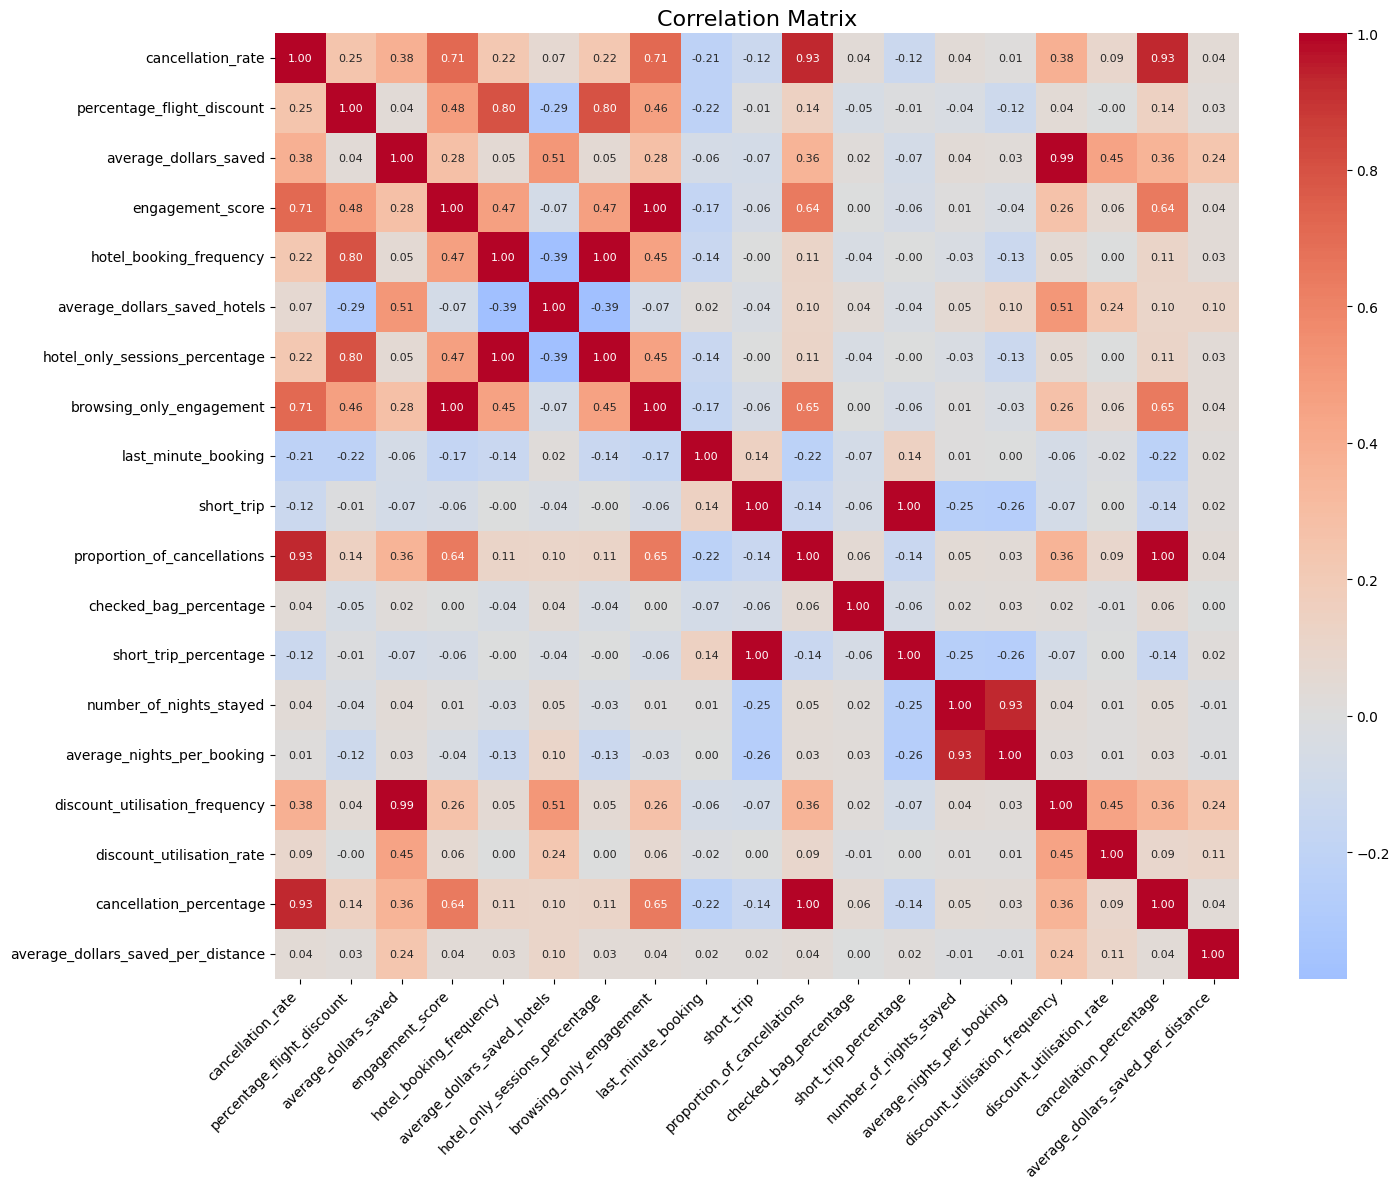

In [ ]:
# Features to measure

all_features = ['cancellation_rate', 'percentage_flight_discount', 'average_dollars_saved',
                'engagement_score', 'hotel_booking_frequency', 'average_dollars_saved_hotels',
                'hotel_only_sessions_percentage', 'browsing_only_engagement', 'last_minute_booking',
                'short_trip', 'proportion_of_cancellations', 'checked_bag_percentage',
                'short_trip_percentage', 'number_of_nights_stayed', 'average_nights_per_booking',
                'discount_utilisation_frequency', 'discount_utilisation_rate', 'cancellation_percentage',
                'average_dollars_saved_per_distance']

# Ensure all features are numeric

df_numeric = df[all_features].select_dtypes(include=[np.number])

# Calculate correlations between specified metrics

correlation_matrix = df_numeric.corr()

# Plot the correlation heatmap

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'fontsize': 8}, fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


View Correlations Between Features

Based on the previous correlations, I can now narrow down my options to features that are not too closely correlated.

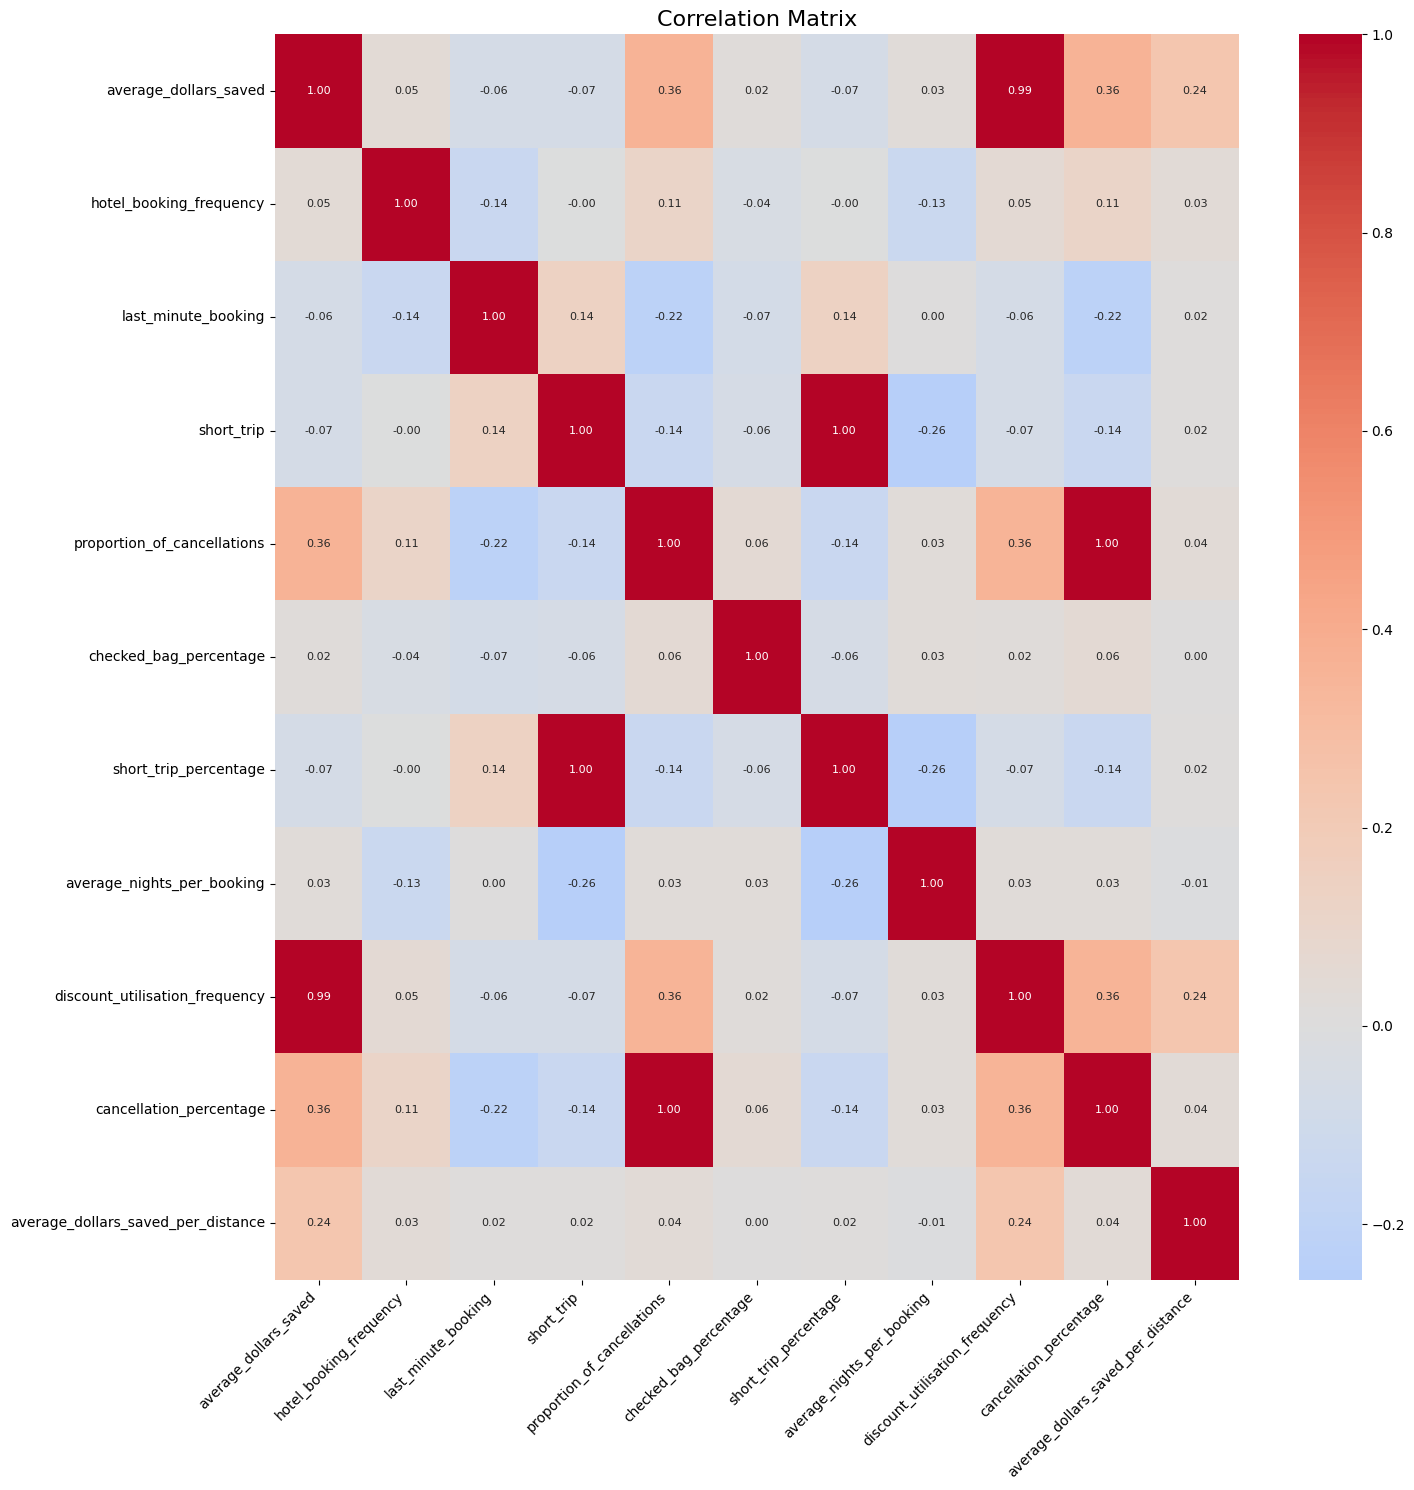

In [ ]:
# Calculate correlations between specified metrics

metrics_columns = ['average_dollars_saved', 'hotel_booking_frequency',
                   'last_minute_booking', 'short_trip', 'proportion_of_cancellations',
                   'checked_bag_percentage', 'short_trip_percentage', 'average_nights_per_booking',
                   'discount_utilisation_frequency', 'cancellation_percentage', 'average_dollars_saved_per_distance']

correlation_matrix = df[metrics_columns].corr()

# Plot the correlation heatmap

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'fontsize': 8}, fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Cluster Centroids with Heatmap

After carefully evaluating the correlation heatmaps, I have selected five features for my K-Means clustering analysis. These features exhibit reasonable independence from each other and align well with the specified perks:

1. **Average_dollars_saved**: This feature calculates the average dollars saved, including both flight and hotel discounts. It's particularly relevant for the "Exclusive Discounts" perk. Although it has a slight correlation with cancellation-related features, it is still valuable for identifying users who would benefit from this perk.

2. **Checked_bag_percentage**: This feature quantifies the percentage of checked bags by dividing the total number of checked bags by the total flights booked and expressing it as a percentage. It is significant for capturing behavior relevant to the Free Checked Bag perk and isn't closely correlated with other features.

3. **Hotel_booking_frequency**: This feature provides insight into how often a user books a hotel during a single session. It is particularly relevant for the Free Hotel Meal perk. Despite a slight correlation with cancellation-related features, it remains useful for clustering users interested in this perk.

4. **Short_trip_percentage**: This feature indicates the percentage of short trips based on a defined threshold. It is valuable for understanding users' tendencies to undertake short trips, making it relevant for the One Night Free Hotel With Flight perk. Interestingly, users who frequently book short trips are not highly correlated with hotel booking features, making this perk enticing for them.

5. **Proportion_of_cancellations**: This feature calculates the ratio of cancellations to total bookings (both flights and hotels) for each user. It provides insights into cancellation behavior and is pertinent to the Free Cancellation perk. Although capturing this behavior is challenging due to the low number of cancellations, it is crucial for identifying cautious bookers who might benefit from this perk.

With these features selected, I am ready to proceed to the next phase of analysis. First, I will create an elbow plot to determine the optimal number of clusters for the dataset. Then, I will use the K-Means algorithm to generate these clusters. Finally, I will inspect the cluster centroids using a heatmap to understand the associations between clusters and perks, providing insights into how different clusters relate to specific perks.

### Plotting the Elbow Curve

The Elbow curve analysis helps determine the optimal number of clusters for a dataset. Although I plan to use 5 clusters to match the 5 distinct perks, this analysis is still important. It validates my choice and explores other possible cluster quantities that might fit the data better. This information will be useful when communicating results to the marketing team and could influence the final recommendations.

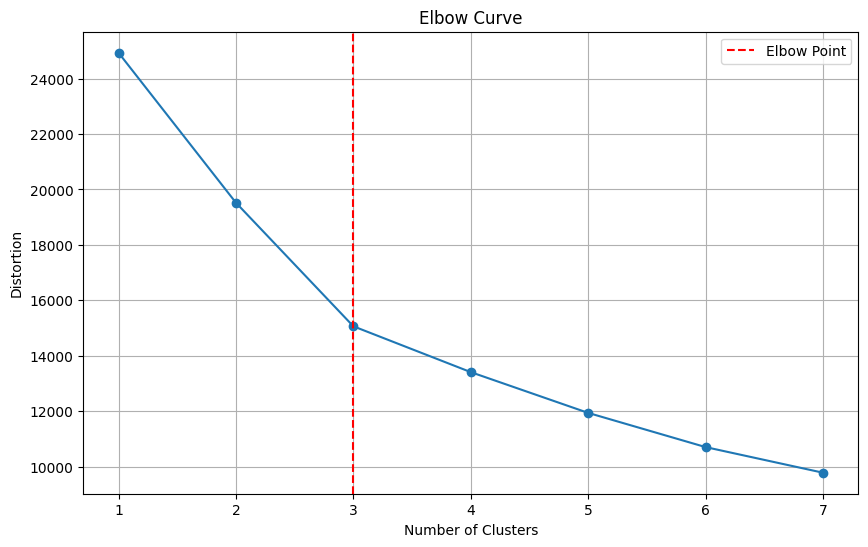

The silhouette score using 3 clusters is: 0.289
The silhouette score using 4 clusters is: 0.267
The silhouette score using 5 clusters is: 0.241
The silhouette score using 6 clusters is: 0.238


In [ ]:
# Select columns for clustering
cluster_columns = ['proportion_of_cancellations', 'checked_bag_percentage',
                   'short_trip_percentage', 'hotel_booking_frequency', 'average_dollars_saved']

# Extract the data for clustering
cluster_data = df[cluster_columns]

# Function to plot the elbow curve
def plot_elbow_curve(data, cluster_ranges):
    distortions = []
    for num_clusters in cluster_ranges:
        model = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
        model.fit(data)
        distortions.append(model.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(cluster_ranges, distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Curve')
    plt.axvline(x=3, color='red', linestyle='--', label='Elbow Point')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to calculate silhouette scores for different numbers of clusters
def calculate_silhouette_scores(data, cluster_range):
    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, tol=1e-4, random_state=0, n_init=10)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        print(f"The silhouette score using {n_clusters} clusters is: {silhouette_avg:.3f}")

# Plotting the elbow curve to find the optimal number of clusters
plot_elbow_curve(cluster_data, cluster_ranges=range(1, 8))

# Calculating silhouette scores for a range of clusters
calculate_silhouette_scores(cluster_data, cluster_range=range(3, 7))


Elbow Curve Analysis

The Elbow curve analysis suggests that an optimal number of clusters for the dataset is around 3. However, using 5 clusters aligns with the task of assigning perks and is still a valid choice, as it doesn't deviate significantly from the elbow point. While I opted for 5 clusters to match the perks, if the elbow curve had strongly indicated a different number with a better balance between within-cluster variance and the number of clusters, I would have considered it more closely. This could lead to a discussion with the marketing team about possibly adjusting the number of perks in the rewards program. This insight will be part of my final recommendation.

Running K-Means and Visualizing with a Centroids Heatmap

   proportion_of_cancellations  checked_bag_percentage  short_trip_percentage  \
0                    -0.322589               -0.292245               0.993602   
1                     2.785735                0.135178              -0.406029   
2                    -0.282499                0.054534               0.979329   
3                    -0.322589                1.384695              -0.814977   
4                    -0.322589               -0.482026              -1.006439   

   hotel_booking_frequency  average_dollars_saved  
0                -0.795511              -0.077536  
1                 0.547947               1.144871  
2                 0.798335              -0.244505  
3                -0.554329              -0.068506  
4                 0.096168              -0.108963  


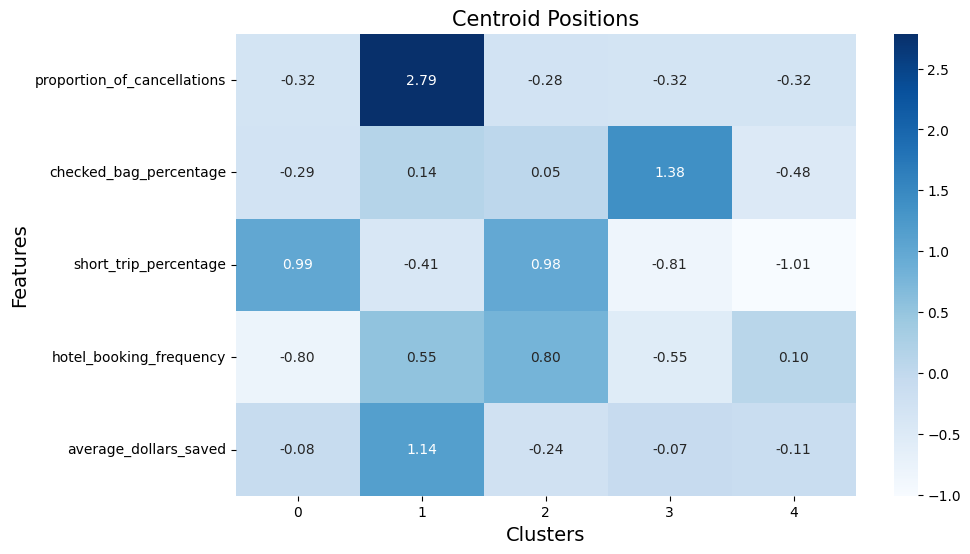

assigned_cluster
Cluster 4    1503
Cluster 0    1180
Cluster 2    1121
Cluster 3     679
Cluster 1     503
Name: count, dtype: int64


In [ ]:
# Perform KMeans clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, tol=1e-4, random_state=0, n_init=10)
kmeans_cluster_labels = kmeans.fit_predict(cluster_data)

# Add cluster labels to the DataFrame
df['kmeans_cluster'] = kmeans_cluster_labels

# Display cluster centroids
model_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=cluster_columns)
print(model_centroids)

# Create a heatmap to visualize cluster centroids with annotations
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(model_centroids.T, cmap="Blues", annot=True, fmt=".2f")
heatmap.set_xlabel("Clusters", fontsize=14)
heatmap.set_ylabel("Features", fontsize=14)
heatmap.set_title("Centroid Positions", fontsize=15)
plt.show()

# Analyze clusters and calculate mean characteristics for each cluster
cluster_characteristics = df.groupby('kmeans_cluster')[cluster_columns].mean()

# Assign labels based on cluster characteristics
cluster_labels = {i: f'Cluster {i}' for i in range(n_clusters)}
df['assigned_cluster'] = df['kmeans_cluster'].map(cluster_labels)

# Display the count of assigned labels
perk_counts = df['assigned_cluster'].value_counts()
print(perk_counts)


### Cluster Analysis Summary

#### Cluster 0:
- **Proportion of Cancellations**: Low, around -0.32.
- **Checked Bag Percentage**: Slightly lower than average, around -0.29.
- **Short Trip Percentage**: High, around 0.99.
- **Hotel Booking Frequency**: Very low, around -0.80.
- **Average Dollars Saved**: Slightly negative, around -0.08.

#### Cluster 1:
- **Proportion of Cancellations**: Very high, around 2.79.
- **Checked Bag Percentage**: Slightly above average, around 0.14.
- **Short Trip Percentage**: Low, around -0.41.
- **Hotel Booking Frequency**: Moderate, around 0.55.
- **Average Dollars Saved**: High, around 1.14.

#### Cluster 2:
- **Proportion of Cancellations**: Slightly negative, around -0.28.
- **Checked Bag Percentage**: Low, around 0.05.
- **Short Trip Percentage**: High, around 0.98.
- **Hotel Booking Frequency**: High, around 0.80.
- **Average Dollars Saved**: Slightly negative, around -0.24.

#### Cluster 3:
- **Proportion of Cancellations**: Low, around -0.32.
- **Checked Bag Percentage**: Negative, around -0.48.
- **Short Trip Percentage**: High, around 0.99.
- **Hotel Booking Frequency**: Low, around -0.55.
- **Average Dollars Saved**: Slightly negative, around -0.07.

#### Cluster 4:
- **Proportion of Cancellations**: Low, around -0.32.
- **Checked Bag Percentage**: High, around 1.38.
- **Short Trip Percentage**: Very low, around -1.01.
- **Hotel Booking Frequency**: Moderate, around 0.10.
- **Average Dollars Saved**: Slightly negative, around -0.11.

These insights provide a detailed understanding of each cluster's characteristics, helping to identify distinct customer behaviors related to cancellations, checked bags, short trips, hotel bookings, and savings.

Checking the Shape and the Silhouette Score

In [ ]:
# Check the cluster data shape
cluster_data.shape

(4986, 5)

#### Cluster Shape Verification

The clusters are exactly as planned—there are 5 clusters

In [ ]:
# Compute the Silhouette Score
silhouette_avg = silhouette_score(cluster_data, df['kmeans_cluster'])

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.24144481756733988


### Evaluating the Clusters with Silhouette Score

The Silhouette Score is a metric used to assess the quality of clustering in unsupervised machine learning tasks. It measures how similar each data point in one cluster is to data points in neighboring clusters, quantifying the separation distance between clusters relative to the compactness within each cluster.

In this case, a Silhouette Score of **0.241** indicates the following:

- The clusters exhibit a moderate level of both separation and cohesion.
- There is some degree of distinction between clusters, but they may not be entirely well-separated, with instances of overlapping or ambiguity in cluster assignments.

A higher Silhouette Score closer to 1 would signify well-separated and distinct clusters, while a lower score closer to -1 would suggest overlapping or poorly defined clusters. A score of 0.241 falls within the moderate range, implying reasonable but not perfect separation of clusters.


### Assigning Clusters to Perks

#### Perk Assignments
**Cluster 0: Free Hotel Meal**
- Members have a low hotel booking frequency but often take short trips.
- This perk is advantageous for travelers seeking convenient dining solutions and hotel-related amenities.

**Cluster 1: Free Cancellation**
- Travelers display high cancellation rates, indicating cautious booking behavior.
- The Free Cancellation perk offers them security, encouraging bookings and potentially combination trips.

**Cluster 2: Exclusive Discounts**
- This cluster is associated with a high average dollars saved.
- They engage frequently in booking behavior, making them more likely to value discounts despite moderate cancellation rates.

**Cluster 3: One Night Free Hotel with Flight**
- Members frequently take short trips.
- The offer of a free night in a hotel is highly valuable, and their low hotel booking frequency presents an opportunity to entice them with package deals.

**Cluster 4: Free Checked Bag**
- Travelers place high importance on checking bags, regardless of trip length.
- The ability to check luggage for free is highly valuable to them.

### Mapping Clusters to Perk Labels

After performing K-Means clustering, I associated each cluster with a corresponding perk based on their unique characteristics and centroid positions. To facilitate result interpretation, I introduced a new column, `assigned_perk`, into the dataset, indicating the assigned perk for each user. This step enhances the clarity and usability of the cluster analysis results.

In [ ]:
# Define a dictionary to map clusters to labels
cluster_labels_mapping = {
    0: "Free Hotel Meal",
    1: "Free Cancellation",
    2: "Exclusive Discounts",
    3: "One Night Free Hotel With Flight",
    4: "Free Checked Bag"}


# Mapping clusters to perks
df['assigned_perk'] = df['kmeans_cluster'].map(cluster_labels_mapping)


# Print labels and their corresponding clusters
labels_and_clusters = {v: k for k, v in cluster_labels_mapping.items()}
for label, cluster in labels_and_clusters.items():
    print(f"Cluster {cluster}: {label}")



Cluster 0: Free Hotel Meal
Cluster 1: Free Cancellation
Cluster 2: Exclusive Discounts
Cluster 3: One Night Free Hotel With Flight
Cluster 4: Free Checked Bag


### Identifying and Extracting Representative Samples

Next, I identify and extract representative samples from the dataset to evaluate how well the assigned cluster labels align with the actual data characteristics. This step offers deeper insights into the unique traits of each cluster.

To begin, I calculate the distances between individual data points and their respective cluster centroids. This distance measurement indicates how closely each data point matches its designated cluster's central characteristics. Due to the dataset's size, I can't visualize all data points for every cluster, but I review a subset to gauge their proximity to the cluster centroids. This preliminary analysis helps validate the clustering results.

I then select a subset of data points, known as representative samples, based on a predetermined percentage of data points within each cluster. This approach ensures that the selected samples provide a comprehensive view of the typical traits and behaviors of each customer segment.

In [ ]:
# Calculate distances to cluster centroids and add as columns to the DataFrame
cluster_distances = kmeans.transform(cluster_data)
for i in range(n_clusters):
    df[f'distance_to_centroid_{i}'] = cluster_distances[:, i]

# Define the percentage of data points to select as representative samples
percentage_to_select = 0.25

# Create a DataFrame to store representative samples
representative_samples = pd.DataFrame()

# Iterate through clusters
for cluster_num in range(n_clusters):
    # Sort data points within the cluster by distance to centroid
    cluster_column = f'kmeans_cluster_{cluster_num}'
    sorted_df = df[df['kmeans_cluster'] == cluster_num].sort_values(by=f'distance_to_centroid_{cluster_num}')

    # Calculate the number of data points to select as representative samples
    num_samples = int(len(sorted_df) * percentage_to_select)

    # Select the top N data points with the smallest distances as representative samples
    selected_samples = sorted_df.head(num_samples)

    # Append the selected samples to the representative_samples DataFrame
    representative_samples = pd.concat([representative_samples, selected_samples])

# Define the relevant columns
columns_for_clustering = ['user_id', 'assigned_cluster'] + ['average_dollars_saved', 'checked_bag_percentage',
                   'hotel_booking_frequency', 'short_trip_percentage', 'proportion_of_cancellations']
distance_columns = [f'distance_to_centroid_{i}' for i in range(n_clusters)]

# Select only the relevant columns and the top 5 rows
relevant_samples = representative_samples[columns_for_clustering + distance_columns].head(5)

# Display the relevant columns in a table
display(relevant_samples.style.hide(axis='index'))


user_id,assigned_cluster,average_dollars_saved,checked_bag_percentage,hotel_booking_frequency,short_trip_percentage,proportion_of_cancellations,distance_to_centroid_0,distance_to_centroid_1,distance_to_centroid_2,distance_to_centroid_3,distance_to_centroid_4
583664,Cluster 0,0.232589,-0.176554,-0.800290,0.993602,-0.322589,0.331037,3.790491,1.684765,2.420664,2.239146
616222,Cluster 0,0.232589,-0.176554,-0.800290,0.993602,-0.322589,0.331037,3.790491,1.684765,2.420664,2.239146
555191,Cluster 0,0.232589,-0.176554,-0.800290,0.993602,-0.322589,0.331037,3.790491,1.684765,2.420664,2.239146
531663,Cluster 0,0.232589,-0.176554,-0.800290,0.993602,-0.322589,0.331037,3.790491,1.684765,2.420664,2.239146
546050,Cluster 0,-0.408301,-0.176554,-0.800290,0.993602,-0.322589,0.350446,3.993483,1.624082,2.425781,2.233096


### Cluster 0: Free Hotel Meal

Representative samples within Cluster 0 exhibit:
- **Average Dollars Saved**: ~0.23
- **Checked Bag Percentage**: ~-0.18
- **Hotel Booking Frequency**: ~-0.80
- **Short Trip Percentage**: ~0.99
- **Proportion of Cancellations**: ~-0.32
- **Distance to Centroid**: ~0.33

These samples confirm the uniformity and specific behavioral patterns of this cluster.

### Creating a Summary Table

To better understand the relationships between identified clusters and their associated perks, I simplified the data presentation by pivoting the DataFrame. This aligns cluster labels on the left with cluster-specific columns at the top, providing a clear view of each cluster's behavior across various features.

By calculating mean values in this structured format, we can easily visualize and compare each cluster's characteristics concerning their assigned perks. This approach simplifies understanding cluster traits and strengthens our analysis narrative.

In [ ]:
# Pivot the DataFrame
pivoted_data = df.pivot_table(index='assigned_perk', values=cluster_columns, aggfunc='mean')


# Display the pivoted data
display(pivoted_data)
pivoted_data = df.pivot_table(index='assigned_perk', values=cluster_columns)



,average_dollars_saved,checked_bag_percentage,hotel_booking_frequency,proportion_of_cancellations,short_trip_percentage
assigned_perk,,,,,
Exclusive Discounts,-0.244505,0.054534,0.798335,-0.282499,0.979329
Free Cancellation,1.144871,0.135178,0.547947,2.785735,-0.406029
Free Checked Bag,-0.108963,-0.482026,0.096168,-0.322589,-1.006439
Free Hotel Meal,-0.077536,-0.292245,-0.795511,-0.322589,0.993602
One Night Free Hotel With Flight,-0.068506,1.384695,-0.554329,-0.322589,-0.814977


### Insights into Clusters and Assigned Perks

The output provides insights into the clusters and their assigned perks:

#### Exclusive Discounts
- **Average Dollars Saved**: Higher values, indicating a strong inclination toward saving money.
- **Checked Bag Percentage**: Some preference for checked bags.
- **Hotel Booking Frequency**: Moderate.
- **Proportion of Cancellations**: Relatively high.
- **Short Trip Percentage**: Low.
- **Summary**: This perk is highly attractive to these users and may reduce cancellations over time.

#### Free Cancellation
- **Average Dollars Saved**: Lower.
- **Checked Bag Percentage**: Lower.
- **Hotel Booking Frequency**: Low.
- **Proportion of Cancellations**: Very high.
- **Short Trip Percentage**: Negative, indicating a preference for longer trips.
- **Summary**: The free cancellation perk offers security, likely increasing engagement with the service.

#### Free Checked Bag
- **Average Dollars Saved**: Slightly negative.
- **Checked Bag Percentage**: Significantly high.
- **Hotel Booking Frequency**: Lower.
- **Proportion of Cancellations**: Low.
- **Short Trip Percentage**: Negative, indicating a preference for longer trips.
- **Summary**: This perk aligns with their preferences and could encourage spending on other trip aspects.

#### Free Hotel Meal
- **Average Dollars Saved**: Relatively low.
- **Checked Bag Percentage**: Low.
- **Hotel Booking Frequency**: High.
- **Proportion of Cancellations**: Low.
- **Short Trip Percentage**: High.
- **Summary**: Ideal for users who enjoy hotel stays and amenities, especially on shorter trips.

#### One Night Free Hotel With Flight
- **Average Dollars Saved**: Lower.
- **Checked Bag Percentage**: Lower.
- **Hotel Booking Frequency**: Low.
- **Proportion of Cancellations**: Low.
- **Short Trip Percentage**: Negative, indicating a preference for shorter trips.
- **Summary**: This perk is valuable for shorter trips and may encourage more combination bookings.

### Summary
The cluster labels correspond well to the distinctive traits and preferences of each customer segment based on their feature values. These insights, drawn from the provided data and feature metrics, offer a clear understanding of how each perk aligns with different user behaviors. Further analysis or validation may be necessary to confirm these findings.

### Assessing Cluster Cohesion

Next, I focused on assessing the cohesion and quality of the assigned clusters. This step evaluates the internal consistency of the clusters, each representing a distinct perk category. By calculating the mean Euclidean distance between data points within each cluster and their respective centroid, I can gauge how closely related and homogeneous the data points are within their clusters. This analysis provides valuable insights into the cohesion and similarity of the data points in each cluster.

In [ ]:
# Initialise a list to store dictionaries
distances_list = []

# Iterate through cluster labels
for cluster_label in cluster_labels_mapping.values():
    # Filter data points for the current cluster
    cluster_data = df[df['assigned_perk'] == cluster_label]

    # Select only the numeric columns for distance calculations
    numeric_cluster_data = cluster_data[cluster_columns].select_dtypes(include=[np.number])

    # Check if there are any rows left in the DataFrame
    if not numeric_cluster_data.empty:
        # Calculate the Euclidean distances between data points and the centroid of the current cluster
        distances = euclidean_distances(numeric_cluster_data, [numeric_cluster_data.mean()])

        # Append a dictionary to the list
        distances_list.append({'cluster_label': cluster_label, 'dist_center': distances.mean()})

# Create a DataFrame from the list of dictionaries
distances_df = pd.DataFrame(distances_list)

# Display the distances DataFrame
display(distances_df)

,cluster_label,dist_center
0,Free Hotel Meal,1.293829
1,Free Cancellation,2.059403
2,Exclusive Discounts,1.246506
3,One Night Free Hotel With Flight,1.469919
4,Free Checked Bag,1.381207


The dist_center values in the output represent the mean Euclidean distances between data points within each cluster and their respective centroids.

### Cluster Descriptions and Perk Assignments

**Cluster 0: Free Hotel Meal**
- **Mean Distance to Centroid**: 1.293829
- **Description**: This cluster has a low mean distance to its centroid, indicating similarity among data points. Members tend to book hotels and opt for short trips. This perk is beneficial for travelers with limited time or those who enjoy hotel amenities and convenient dining options.

**Cluster 1: Free Cancellation**
- **Mean Distance to Centroid**: 2.059403
- **Description**: This cluster shows more variability, suggesting diverse behaviors within the group. However, common traits include cautious booking and cost-consciousness. The free cancellation perk offers security, encouraging early and combined bookings.

**Cluster 2: Exclusive Discounts**
- **Mean Distance to Centroid**: 1.246506
- **Description**: This cluster has high similarity among data points, indicated by a low mean distance. It is closely associated with the Exclusive Discounts perk due to a positive relationship with average dollars saved. These customers frequently engage in booking activities, increasing the likelihood of cancellations.

**Cluster 3: One Night Free Hotel With Flight**
- **Mean Distance to Centroid**: 1.469919
- **Description**: This cluster demonstrates moderate homogeneity. Members favor short trips, making the free night in a hotel a valuable perk. Their infrequent hotel bookings present an opportunity for package deals.

**Cluster 4: Free Checked Bag**
- **Mean Distance to Centroid**: 1.381207
- **Description**: This cluster has a low mean distance to its centroid, indicating homogeneity. Travelers in this cluster place high value on checking bags, regardless of trip length, making the free checked bag perk highly appealing.

### Summary
The clusters consistently show relatively low mean distances to their centroids, signifying that data points within each cluster share common characteristics. This coherence supports the assignment of perks based on the identified traits and behaviors of customers.

### Distribution of Clusters vs Features

In this section, I explore how different features are distributed across the defined clusters using Kernel Density Estimates (KDE). Each subplot represents a specific feature, and within each subplot, I visualize the distribution of each cluster's data. This approach helps identify notable patterns or differences among clusters.

I've focused on plotting distributions for `average_dollars_saved`, `checked_bag_percentage`, and `hotel_booking_frequency`, as `proportion_of_cancellations` and `short_trip_percentage` exhibit limited variability, making them less suitable for KDE plots. This selection ensures a clearer and more insightful analysis while avoiding potential issues related to singular metrics.

In [ ]:
# Data
data = df

# Columns of interest
short_trip_column = "short_trip_percentage"
cancellation_column = "proportion_of_cancellations"

# Describe the distribution of values
short_trip_description = data[short_trip_column].describe()
cancellation_description = data[cancellation_column].describe()

# Print the descriptions
print(f"Description of {short_trip_column}:\n{short_trip_description}\n")
print(f"Description of {cancellation_column}:\n{cancellation_description}")


Description of short_trip_percentage:
count    4.986000e+03
mean    -1.353822e-17
std      1.000100e+00
min     -1.006439e+00
25%     -1.006439e+00
50%      9.936025e-01
75%      9.936025e-01
max      9.936025e-01
Name: short_trip_percentage, dtype: float64

Description of proportion_of_cancellations:
count    4.986000e+03
mean    -3.633943e-17
std      1.000100e+00
min     -3.225887e-01
25%     -3.225887e-01
50%     -3.225887e-01
75%     -3.225887e-01
max      9.702335e+00
Name: proportion_of_cancellations, dtype: float64


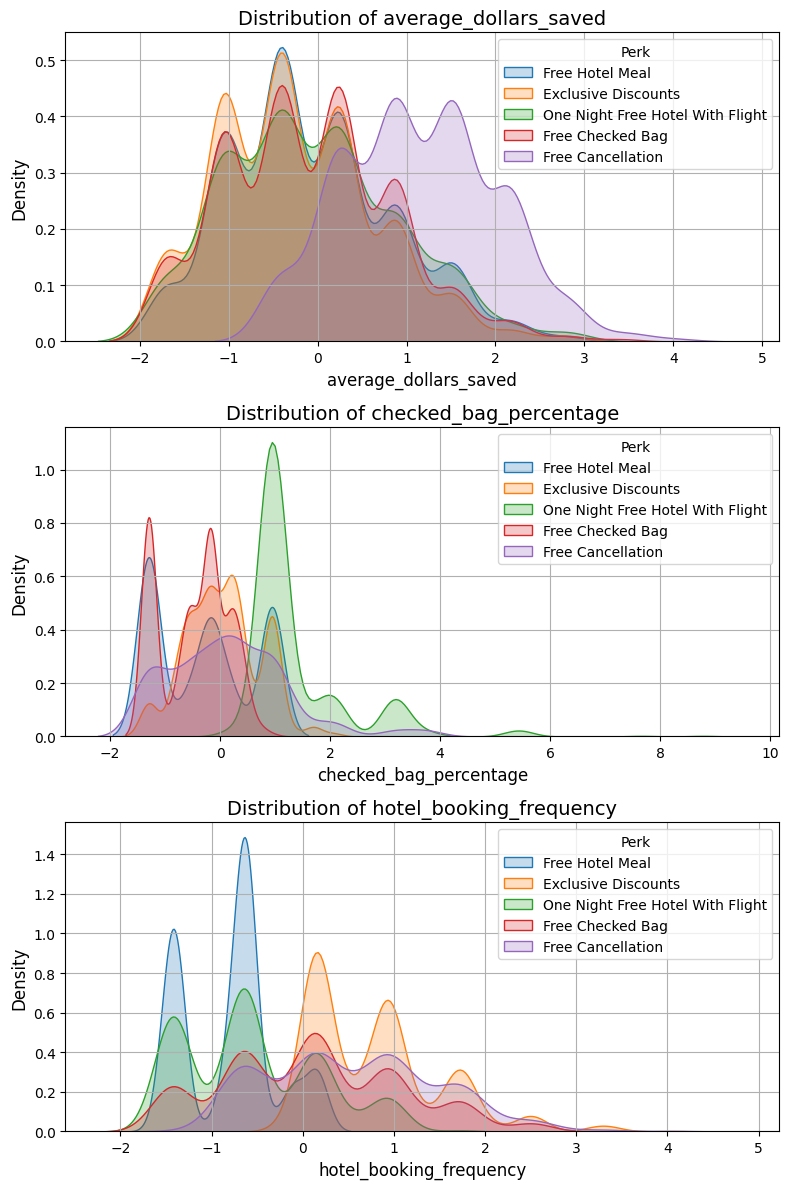

In [ ]:

# Define the list of features
list_of_features = ["average_dollars_saved", "checked_bag_percentage", "hotel_booking_frequency"]

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(list_of_features), ncols=1, figsize=(8, 12))

# Loop through each feature and plot KDE for each perk
for i, feature in enumerate(list_of_features):
    ax = axes[i]
    for perk in df['assigned_perk'].unique():
        sns.kdeplot(data=df[df['assigned_perk'] == perk], x=feature, label=perk, ax=ax, fill=True)
    ax.set_title(f"Distribution of {feature}", fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend(title="Perk", fontsize=10)
    ax.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Key Observations

The Kernel Density Estimate (KDE) plots provide valuable insights into the data distribution among perks. Here are some key observations:

- **Overlap Among Perks**: There is a considerable degree of overlap among the perks, suggesting some shared characteristics or behaviors.
  
- **Free Hotel Meal**: This perk shows a broader distribution for the hotel_booking_frequency feature, aligning with expectations that users favor hotel-related perks.
  
- **Free Checked Bag and Exclusive Discounts**: These perks exhibit wider distributions in the checked_bag_percentage and average_dollars_saved features, respectively, indicating distinct preferences for these perks.

The presence of overlap between perks implies that there may be shared characteristics or behaviors that warrant further investigation.